In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df['avg_score'] =  (df['math score'] + df['reading score'] + df['writing score']) / 3
df['performance'] = pd.qcut(df['avg_score'], q=3, labels=['low', 'medium', 'high'])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,medium
1,female,group C,some college,standard,completed,69,90,88,82.333333,high
2,female,group B,master's degree,standard,none,90,95,93,92.666667,high
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,low
4,male,group C,some college,standard,none,76,78,75,76.333333,high


In [6]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])
df['performance'] = le.fit_transform(df['performance'])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,performance
0,0,1,1,1,1,72,72,74,72.666667,2
1,0,2,4,1,0,69,90,88,82.333333,0
2,0,1,3,1,1,90,95,93,92.666667,0
3,1,0,0,0,1,47,57,44,49.333333,1
4,1,2,4,1,1,76,78,75,76.333333,0


In [7]:
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Impact of Test Preparation')

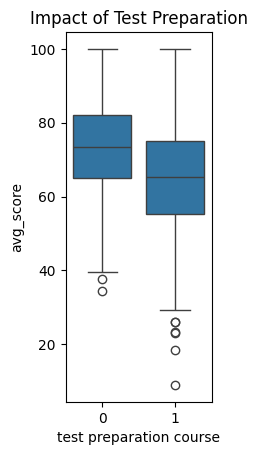

In [8]:
# Plot 1: Test Prep Impact
plt.subplot(1, 3, 1)
sns.boxplot(x='test preparation course', y='avg_score', data=df)
plt.title('Impact of Test Preparation')

Text(0.5, 1.0, 'Performance by Gender')

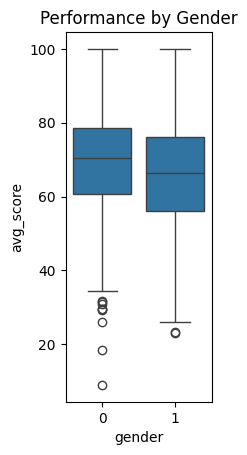

In [9]:
# Plot 2: Gender Performance
plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='avg_score', data=df)
plt.title('Performance by Gender')

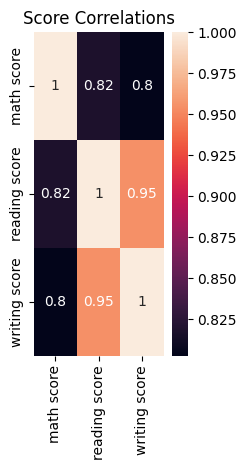

In [10]:
# Plot 3: Score Correlations
plt.subplot(1, 3, 3)
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True)
plt.title('Score Correlations')
plt.tight_layout()

In [11]:
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 
        'test preparation course', 'math score', 'reading score', 'writing score']]
y = df['performance']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
y_pred = rf_model.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       1.00      0.99      0.99        75
           2       0.94      0.98      0.96        59

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.98      0.97      0.98       200



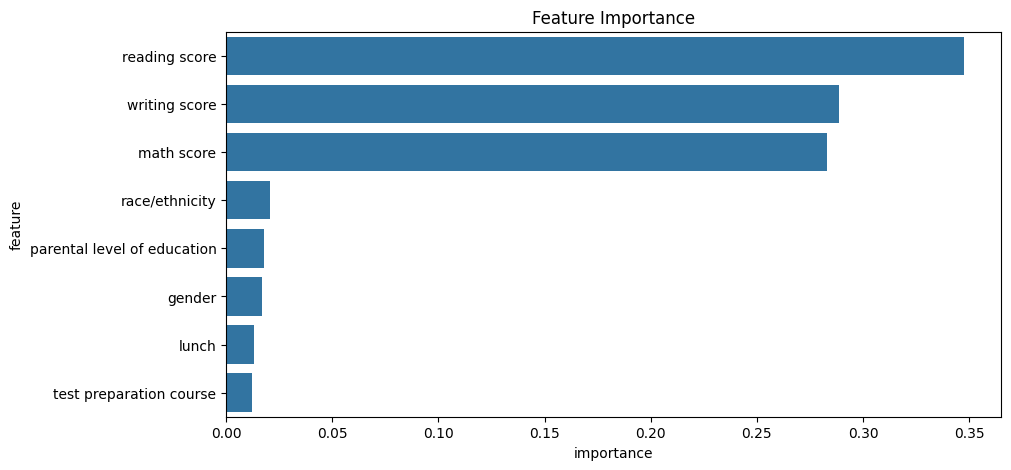

In [15]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()